Assignment about Random variation and power analysis. Link to page [here](https://www.coursera.org/learn/statistical-inferences/supplement/6E39T/assignment-5-2-random-variation-and-power-analysis)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '/home/src')
sys.path

['/home/src',
 '/home/notebooks',
 '/usr/local/lib/python37.zip',
 '/usr/local/lib/python3.7',
 '/usr/local/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/site-packages',
 '/usr/local/lib/python3.7/site-packages/IPython/extensions',
 '/root/.ipython']

In [106]:
import numpy as np

from simulate_one_group import simulate_one_group
from simulations import simulate_normal
from march_of_the_pvalue import march_of_the_pvalue
from gpower import power_twogroup_indep_ttest

**Variation in single samples**

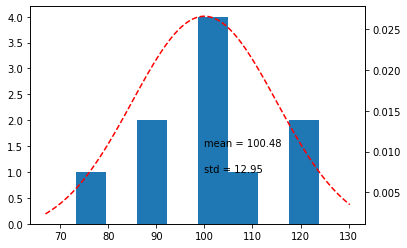

In [4]:
samples, ax = simulate_one_group(number_samples=10)

# Question 1

In [5]:
samples = simulate_normal(100, 15, 10, 10)

In [6]:
samples_means = samples.mean(axis=0)
f"Max difference in means = {samples_means.max() - samples_means.min():.2f}"

'Max difference in means = 20.44'

# Question 2

In [7]:
samples = simulate_normal(100, 2, 10, 10)

In [8]:
samples_means = samples.mean(axis=0)
f"Max difference in means = {samples_means.max() - samples_means.min():.2f}"

'Max difference in means = 1.32'

D) With sd = 2, the variation in means has decreased substantially compared to sd = 15.

# Question 3

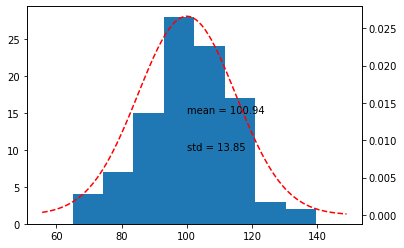

In [9]:
samples, ax = simulate_one_group(number_samples=100)

C) The data always come from a population where IQ scores are normally distributed, but this is very difficult to see, especially when n = 10, but sometimes also when n = 100.

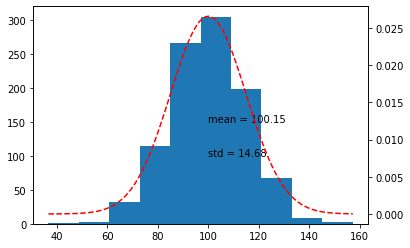

In [10]:
samples, ax = simulate_one_group(number_samples=1000)

**Planning for Accuracy**

In [11]:
# Sample size to estimate mean within 2 pts 95% of the time?
# Need 95% CI to have width 4. Half-width of 95% CI = 1.96 * std / sqrt(N)
(1.96*15/2)**2

216.08999999999997

In [12]:
samples = simulate_normal(100, 15, 216, 1000)
samples_mean = samples.mean(axis=0)

np.mean((samples_mean > 98) & (samples_mean < 102))

0.957

**Variations in p-values, statistical power, and a-priori power analysis**

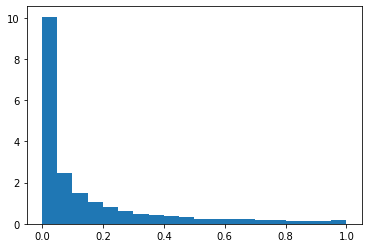

In [38]:
pvalues, ax = march_of_the_pvalue(number_simulations=10000, 
                                  mean_diff=6, 
                                  sample_size=50)

In [39]:
power = np.mean(pvalues < 0.05)
print(f"Empirical power = {power:.2f}")

Empirical power = 0.50


Statistical power is a function of the effect size, the alpha level, and the sample size. The true effect size is what you measure, so you can’t determine it yourself. The alpha level is typically set to 0.05. That means you can only directly influence the sample size, if you want to achieve a specific power. Therefore, in what is known as a-priori power analysis, you determine the sample size required to achieve a certain level of statistical power, given an alpha level, and assuming a certain effect size.

In [43]:
from scipy.stats import t

In [54]:
t(2*20-2).ppf(0.975)

2.024394164575136

In [112]:
power_twogroup_indep_ttest(mean_diff=6, sample_size=164, std=15, alpha_level=0.05)

0.9506816422119021

In [72]:
t(2*50-2).ppf(0.975)

1.984467454426692

In [79]:
from scipy.stats import nct

In [109]:
distr = nct(df=28, nc=1.0954451150103324)
distr.cdf(2.048407141795244) - distr.cdf(-2.048407141795244)

0.8151503750112927